# 2017 서울시 구별 CCTV 현황

## 과제1 : 서울시 구별 경찰서수와 CCTV설치수 조사


In [19]:
import platform

from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns
sns.set()

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,6]

In [2]:
df = pd.read_csv('./data/public_seoul_cctv_2017.csv', encoding = 'EUC-KR')

In [3]:
df

,경찰서,개소,대수
0,중부,304,517
1,종로,214,480
2,남대문,159,202
3,서대문,376,"1,131"
4,혜화,215,481
5,용산,632,"1,897"
6,성북,453,"1,276"
7,동대문,486,"1,396"
8,마포,703,952
9,영등포,745,"1,122"


In [4]:
df.info() # 32, 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
경찰서    32 non-null object
개소     32 non-null object
대수     32 non-null object
dtypes: object(3)
memory usage: 848.0+ bytes


In [5]:
df.columns

Index(['경찰서', '개소', '대수'], dtype='object')

In [6]:
# 문자열 -> 숫자형으로 변환
df['개소'] = df['개소'].apply(lambda x: x.replace(',',''))
df['대수'] = df['대수'].apply(lambda x: x.replace(',',''))

In [7]:
df['개소'] = df['개소'].apply(lambda x: int(x))
df['대수'] = df['대수'].apply(lambda x: int(x))


In [8]:
df

,경찰서,개소,대수
0,중부,304,517
1,종로,214,480
2,남대문,159,202
3,서대문,376,1131
4,혜화,215,481
5,용산,632,1897
6,성북,453,1276
7,동대문,486,1396
8,마포,703,952
9,영등포,745,1122


In [9]:
type(df['개소'][2])

numpy.int64

In [10]:
# 총계 제거
df = df[0:31]
df

,경찰서,개소,대수
0,중부,304,517
1,종로,214,480
2,남대문,159,202
3,서대문,376,1131
4,혜화,215,481
5,용산,632,1897
6,성북,453,1276
7,동대문,486,1396
8,마포,703,952
9,영등포,745,1122


In [11]:
# 정렬
df = df.sort_values(by = '대수', ascending= False)

## 과제2 : 경찰서관할별 CCTV (설치대수) 조사


In [12]:
df_off = df[['경찰서','개소']]
df_cctv = df[['경찰서','대수']]

df_off

,경찰서,개소
24,양천,763
5,용산,632
30,수서,677
18,관악,1042
22,구로,695
17,강남,596
26,노원,1288
7,동대문,486
6,성북,453
10,성동,497


## 과제3 : 과제1,2를 하나의 그래프로 나타내보자.


- 서울시 구별 경찰서수와 CCTV설치수 조사

C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52272 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s

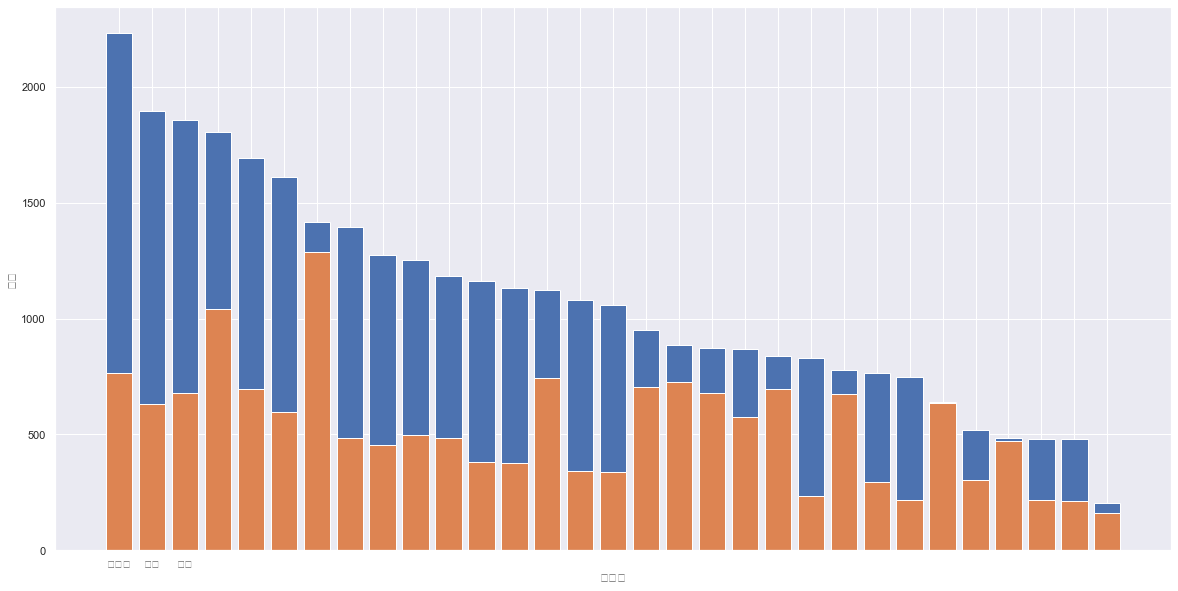

In [13]:
t = np.arange(0 , len(df))
xlabels = list(df.columns)
df_cctv = df[['경찰서','대수']]

plt.rcParams['figure.figsize'] = [20, 10]
plt.bar(t, df_cctv['대수'])
plt.bar(t, df_off['개소'])
plt.xlabel('경찰서')
plt.ylabel('개소')
plt.xticks(t,xlabels )

plt.show()

- 경찰서관할 ccTV 설치대수

In [14]:
df_cctv = df[['경찰서','대수']]
df_cctv.head()

,경찰서,대수
24,양천,2234
5,용산,1897
30,수서,1856
18,관악,1804
22,구로,1691


C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52380 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.

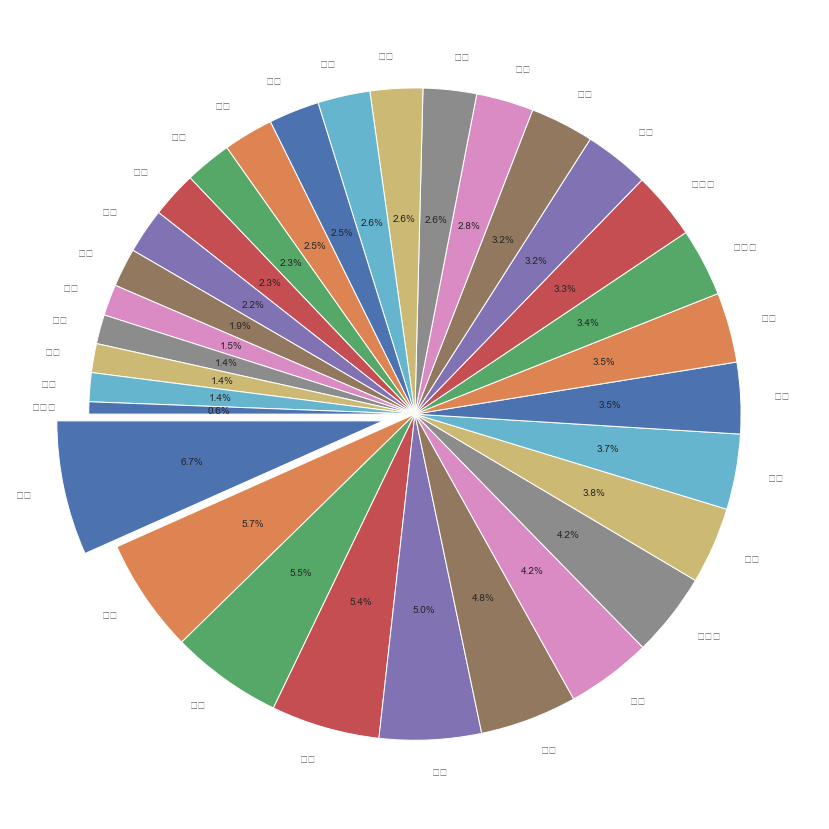

In [15]:
plt.rcParams['figure.figsize'] = [15,15]
label = list(df_cctv['경찰서'])
size = list(df_cctv['대수'])
explode = np.zeros((1, 31)).flatten()
explode[0] = 0.1

plt.pie(size, labels = label, autopct = '%1.1f%%', shadow = False, startangle = 180, explode = explode)
plt.show()

## 과제4 : 경찰서수가 가장 많은구, CCTV가 가장 많이 설치된구를 파이차트로 나타내보자


In [22]:
plt.rcParams['figure.figsize'] = [15,15]
label = list(df_cctv['경찰서'])
size = list(df_cctv['대수'])
explode = np.zeros((1, 31)).flatten()
print(explode)
for i in explode:
    explode[i] = i /10

plt.pie(size, labels = label, autopct = '%1.1f%%', shadow = False, startangle = 180, explode = explode)
plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

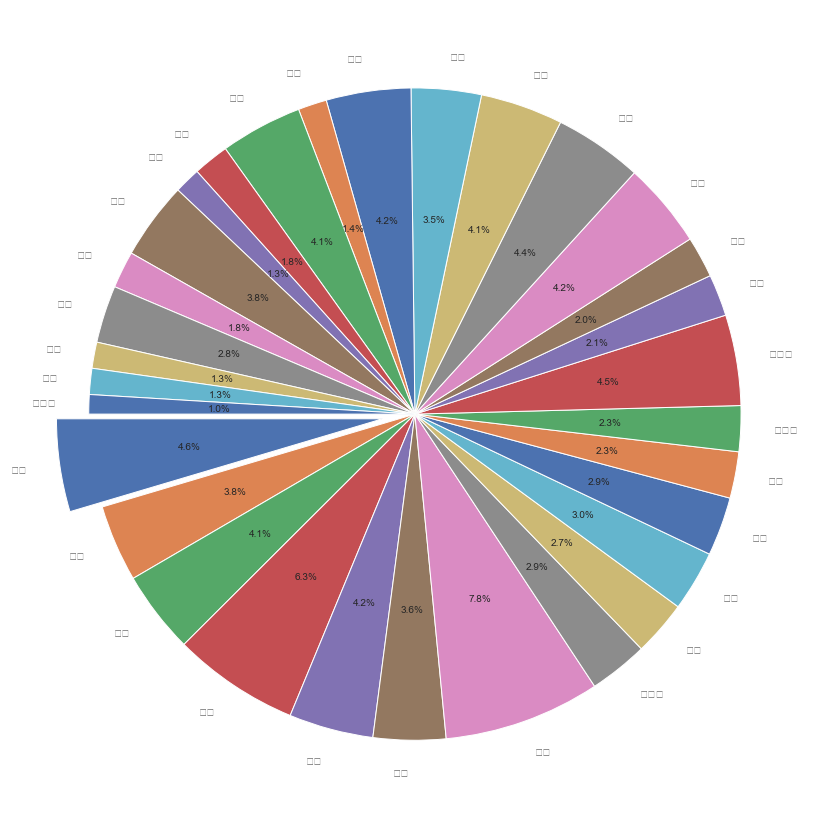

In [20]:
plt.rcParams['figure.figsize'] = [15,15]
label = list(df_off['경찰서'])
size = list(df_off['개소'])
explode = np.zeros((1, 31)).flatten()
explode[0] = 0.1

plt.pie(size, labels = label, autopct = '%1.1f%%', shadow = False, startangle = 180, explode = explode)
plt.show()

## 과제5 : 모든 그래프를 1Page Report로 나타내보자

C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47549 missing from current font.
  font.set_text(s

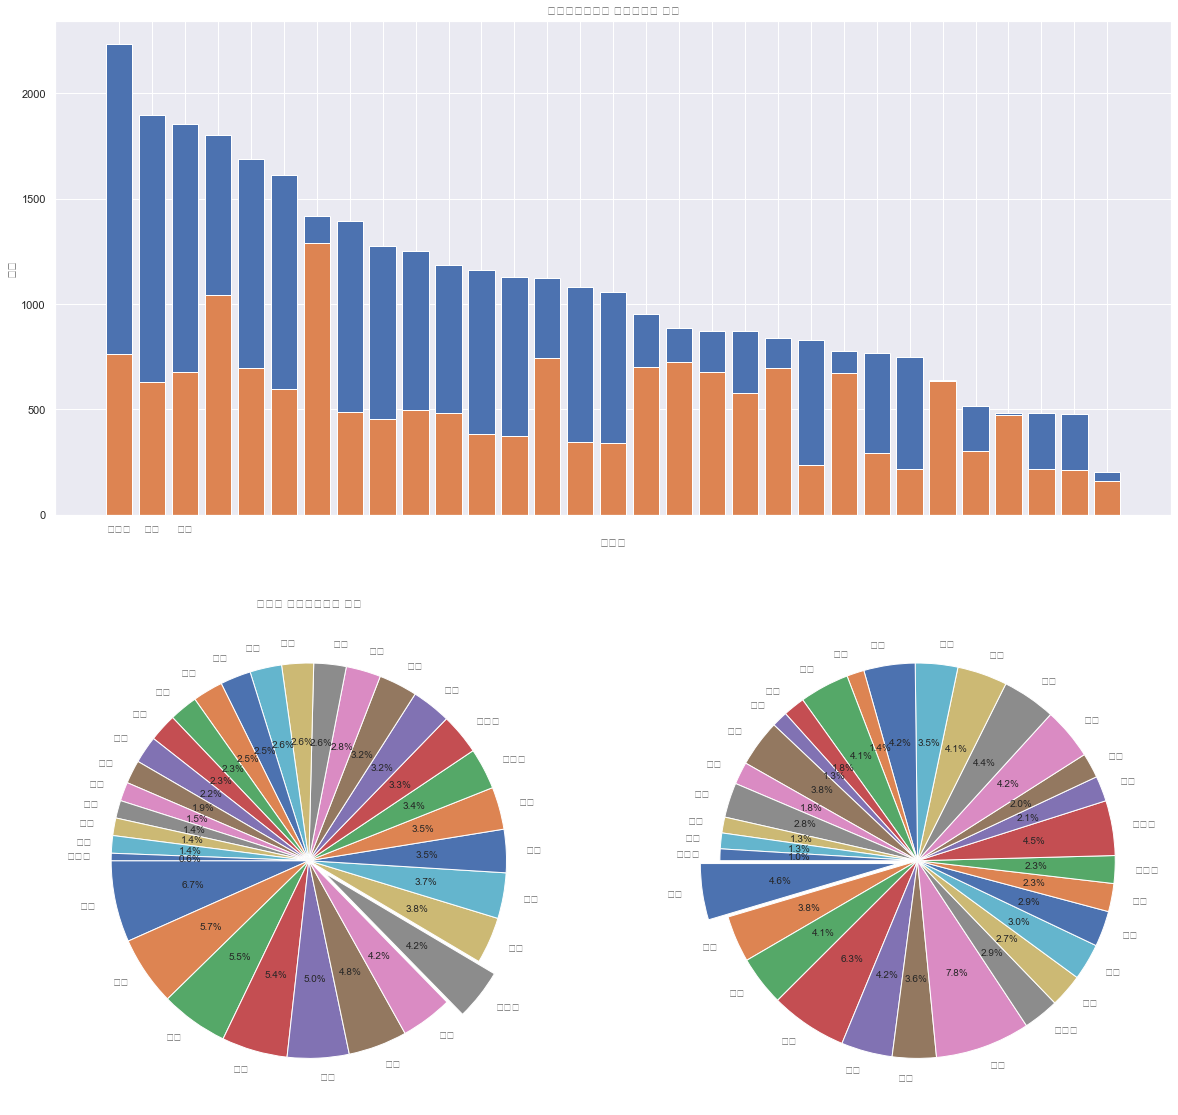

In [18]:
plt.figure(figsize=(20,20))

plt.subplot(211) 
plt.title('노후공공시설물 설립년도별 현황')
t = np.arange(0 , len(df))
xlabels = list(df.columns)
df_cctv = df[['경찰서','대수']]
plt.rcParams['figure.figsize'] = [20, 10]
plt.bar(t, df_cctv['대수'])
plt.bar(t, df_off['개소'])
plt.xlabel('경찰서')
plt.ylabel('개소')
plt.xticks(t,xlabels )

plt.subplot(223) 
plt.title("시도별 노후공공시설 현황")
label = list(df_cctv['경찰서'])
size = list(df_cctv['대수'])
explode = np.zeros((1, 31)).flatten()
explode[7] = 0.1
plt.pie(size, labels = label, autopct = '%1.1f%%', shadow = False, startangle = 180, explode = explode)

plt.subplot(224)
label = list(df_off['경찰서'])
size = list(df_off['개소'])
explode = np.zeros((1, 31)).flatten()
explode[0] = 0.1

plt.pie(size, labels = label, autopct = '%1.1f%%', shadow = False, startangle = 180, explode = explode)
plt.show()